In [1]:
import os
import pandas as pd
import plotly.express as px
import progressbar
import json
import numpy as np

## Get the paths and build table names for iteration

In [2]:
data_path = '../src/data'
mapping_corpus_path = data_path + r'/product/lspc2020_to_tablecorpus'
mapping_corpus_path_2 = data_path + r'/product/lspc2020_to_tablecorpus/Cleaned'
table_corpus_path = data_path + r'/product/product_top100/cleaned'
table_corpus_path_with_id = data_path + r'/product/product_top100/cleaned/with_id'
table_corpus_path2 = data_path + r'/product/product_minimum3/cleaned/with_id'

In [3]:
zip_files_mapping = [file for file in os.listdir(mapping_corpus_path_2) if file.endswith('.json.gz')]
zip_files_tables = [file for file in os.listdir(table_corpus_path) if file.endswith('.json.gz')]

In [ ]:
# count = 0
# count_1=0
# with progressbar.ProgressBar(max_value=len(zip_files_tables)) as bar:
#     for zip_file in zip_files_tables:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(table_corpus_path + '/{}'.format(zip_file), compression='gzip', lines=True)     
#         df['cluster_id']=0
#         for zip_file_map in zip_files_mapping:
#             count_1=count_1+1
#             print(count_1)
#             df_map = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file_map), compression='gzip', lines=True)
#             for i in range(len(df_map)):
#                 if df_map['table_id'][i]=='{}'.format(zip_file):
#                   index_map=df_map['row_id'][i]
#                   if df.index[df['row_id'] == index_map].size != 0:
#                     index_table=df.index[df['row_id'] == index_map][0]
#                     if df['cluster_id'][index_table]==0:
#                         df['cluster_id'][index_table]=df_map['cluster_id'][i] 
#                     else:
#                         print('double product value in table')
#         df.to_json(table_corpus_path_with_id + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         df
#         count += 1
#         bar.update(count)

In [ ]:
# count = 0
# count_1=0
# with progressbar.ProgressBar(max_value=len(zip_files_tables)) as bar:
#     for zip_file in zip_files_tables:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(table_corpus_path2 + '/{}'.format(zip_file), compression='gzip', lines=True)     
#         df['cluster_id']=0
#         for zip_file_map in zip_files_mapping:
#             count_1=count_1+1
#             print(count_1)
#             df_map = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file_map), compression='gzip', lines=True)
#             for i in range(len(df_map)):
#                 if df_map['table_id'][i]=='{}'.format(zip_file):
#                   index_map=df_map['row_id'][i]
#                   if df.index[df['row_id'] == index_map].size != 0:
#                     index_table=df.index[df['row_id'] == index_map][0]
#                     if df['cluster_id'][index_table]==0:
#                         df['cluster_id'][index_table]=df_map['cluster_id'][i] 
#                     else:
#                         print('double product value in table')
#         df.to_json(table_corpus_path2_with_id + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         df
#         count += 1
#         bar.update(count)

## Only use first cleaning step on cluster_id tables

#### Matching the cluster_ids to the entity tables Top100 did not result in good clusters, as the Top100 seem to be pretty specific regarding their input, e.g., amazonaws with aws-ids as products -> no matches somewhere else

In [ ]:
# # Use the 4 endings to search for english websites and then only keep these to get valid cluster_ids
# def clean_table(df):
#   valid_tld = ['.com', '.net', '.org', '.uk']
#   df['Valid']=0
#   for i in range(len(df)):
#     #print(i)
#     for tld in valid_tld:
#       if tld in df['table_id'][i]:
#         df['Valid'][i]=1
#   return df[df['Valid']==1]

In [ ]:
# #clean mapping files and save them again
# # then use the cleaned tables to append into a series and the get a dataframe from that
# count = 0
# count_1=0
# data=[]
# with progressbar.ProgressBar(max_value=len(zip_files_mapping)) as bar:
#     for zip_file in zip_files_mapping:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', lines=True)
#         #df=clean_table(df)
#         #df['table_name']='{}'.format(zip_file)
#         #df.to_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         data.append(df)
#         count += 1
#         bar.update(count)
# #large_df= pd.concat(data, ignore_index=True)
# #large_df.to_json(os.path.join(mapping_corpus_path, 'concatentation'), compression='gzip', orient='records', lines=True)

In [ ]:
# #see the input of the series
# data

### Concat the series into a dataframe and then sort by the cluster_ids to get the table counts for each cluster

In [ ]:
# large_df= pd.concat(data, ignore_index=True)

In [ ]:
#table has around 28 Million valid cluster ids (not necessarily unique)
# large_df

## Filter on cluster_id and table_id to be easily able to count the table_ids per unique cluster

In [4]:
# get dictionaries
data_path_1 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned/allocation_amount_only_total_dict.json'
data_path_2 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned/allocation_amount_only_set_dict.json'

In [5]:
with open(data_path_1) as f:
    data_1=json.load(f)
with open(data_path_2) as f:
    data_2=json.load(f)

In [7]:
df_total=pd.DataFrame.from_dict(data_1, orient='index')
df_total

,0
73924608,1
31326208,1
22544400,1
51904529,1
74055698,1
...,...
14680043,1
6553589,1
20709366,1
75628536,1


In [8]:
df_set=pd.DataFrame.from_dict(data_2, orient='index')
df_set

,0
73924608,1
31326208,1
22544400,1
51904529,1
74055698,1
...,...
14680043,1
6553589,1
20709366,1
75628536,1


In [9]:
df_total=df_total.reset_index().rename(columns={0:"Amount",'index':"cluster_id"})
df_set=df_set.reset_index().rename(columns={0:"Amount",'index':"cluster_id"})

In [10]:
df_set.max()

index     9999996
Amount       1285
dtype: object

In [11]:
df_total.max()

index     9999996
Amount       2600
dtype: object

In [12]:
# We discard all clusters with less than 2 entries, cause we cannot match anything there, so 1,6 million clusters remain
df_set=df_set[df_set['Amount']>1]
df_set

,index,Amount
5,131092,29
9,4980762,4
25,17694777,2
27,2490427,9
28,4980796,2
...,...,...
20852522,55847403,2
20887842,2436046,2
20892455,740855,2
20900059,2721215,2


In [13]:
df_set.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1244562.0,4.0,11.0,2.0,2.0,2.0,3.0,1285.0


<AxesSubplot:ylabel='Frequency'>

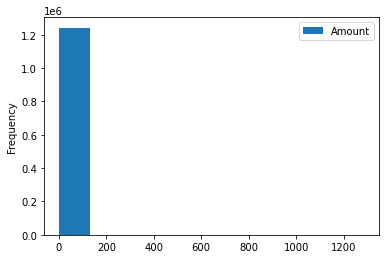

In [16]:
df_set.plot(x='cluster_id',y='Amount',kind='hist')

In [17]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_15=df_set[df_set['Amount']>15]
df_15

,cluster_id,Amount
5,131092,29
30,47710279,42
201,2621903,33
642,787983,18
646,1050139,16
...,...,...
8306446,65770080,17
8780123,19170901,17
9040570,58582000,16
9429552,19412215,17


In [19]:
df_15.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,19367.0,59.0,69.0,16.0,22.0,33.0,63.0,1285.0


<AxesSubplot:ylabel='Frequency'>

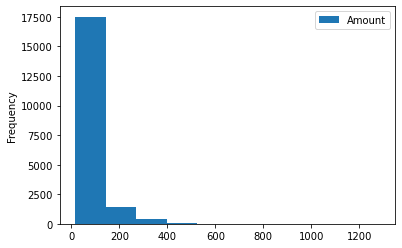

In [20]:
df_15.plot(x='cluster_id',y='Amount',kind='hist')

In [21]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_150=df_set[df_set['Amount']>150]
df_150

,cluster_id,Amount
696,63047326,158
729,26085086,162
1001,59902335,185
1406,47320529,156
1584,24252278,176
...,...,...
1082271,5388699,172
1093363,63881368,174
1192604,40071639,154
1198138,72856662,202


In [22]:
df_150.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1608.0,242.0,99.0,151.0,171.0,205.0,280.0,1285.0


<AxesSubplot:ylabel='Frequency'>

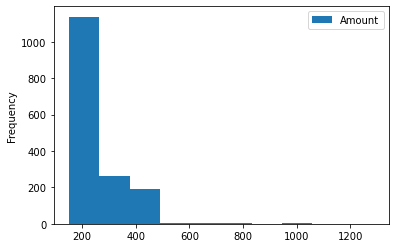

In [23]:
df_150.plot(x='cluster_id',y='Amount',kind='hist')

In [25]:
df_15_500=df_15[df_15['Amount']<500]

<AxesSubplot:ylabel='Frequency'>

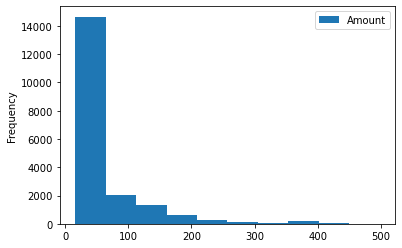

In [27]:
df_15_500.plot(x='cluster_id',y='Amount',kind='hist')

## Match the number dictionaries with the information about the brand

In [4]:
# get dictionaries
electronics_path = '../src/data/product/product_electronics/electronics_dict.json'
clothes_path = '../src/data/product/product_clothes/clothes_dict.json'
mapping_corpus_path_2 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned'

In [5]:
with open(electronics_path) as f:
    electronics_data=json.load(f)

In [6]:
with open(clothes_path) as f:
    clothes_data=json.load(f)

In [7]:
#clean the dictionaries by getting rid of the first key 
cleaned_dictionary_electronics={}
for value in electronics_data.values():
    cleaned_dictionary_electronics.update(value)

In [8]:
#clean the dictionaries by getting rid of the first key 
cleaned_dictionary_clothes={}
for value in clothes_data.values():
    cleaned_dictionary_clothes.update(value)

In [9]:
#put the dictionaries into dataframes 
df_electronics=pd.DataFrame.from_dict(cleaned_dictionary_electronics, orient='index')
df_clothes=pd.DataFrame.from_dict(cleaned_dictionary_clothes, orient='index')

In [10]:
#compare column names of table before and after dropping to actually get a feeling for the best products
electronics_before_cleaning = df_electronics.index.tolist()
#drop empty rows
df_electronics.dropna(how='all', inplace=True)
electronics_after_cleaning = df_electronics.index.tolist()
list(set(electronics_before_cleaning) - set(electronics_after_cleaning))

[]

In [11]:
# get information about top 20 electronic brands by hard coding to find rows with most column content
dataframe = pd.isna(df_electronics[82])
newlist = dataframe[dataframe==False].index.tolist()
newlist
#get information about which brands to be dropped, as otherwise running time of code would be too high
list(set(electronics_after_cleaning) - set(newlist))

[]

In [12]:
# get information about top 20 clothes brands by hard coding to find rows with most column content
clothes_before_cleaning = df_clothes.index.tolist()
dataframe = pd.isna(df_clothes[150])
new_list_clothes = dataframe[dataframe==False].index.tolist()
new_list_clothes
#get information about which brands to be dropped, as otherwise running time of code would be too high
list(set(clothes_before_cleaning) - set(new_list_clothes))

[]

In [13]:
# use the cleaned tables to append into a series and the get a dataframe from that with the remaining cluster ids
count = 0
data=[]
with progressbar.ProgressBar(max_value=len(zip_files_mapping)) as bar:
    for zip_file in zip_files_mapping:
        print('/{}'.format(zip_file))
        df = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', lines=True)
        data.append(df)
        count += 1
        bar.update(count)
df_large= pd.concat(data, ignore_index=True)
#df.large.to_json(os.path.join(mapping_corpus_path_2, 'concatentation'), compression='gzip', orient='records', lines=True)

/map_to_tables_35.json.gz


  0% (0 of 359) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

/map_to_tables_279.json.gz


  0% (2 of 359) |                        | Elapsed Time: 0:00:00 ETA:   0:01:33

/map_to_tables_223.json.gz


  0% (3 of 359) |                        | Elapsed Time: 0:00:00 ETA:   0:01:35

/map_to_tables_182.json.gz


  1% (4 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:01:55

/map_to_tables_88.json.gz


  1% (5 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:01:51

/map_to_tables_27.json.gz


  1% (6 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:01:53

/map_to_tables_166.json.gz


  1% (7 of 359) |                        | Elapsed Time: 0:00:02 ETA:   0:01:54

/map_to_tables_321.json.gz


  2% (8 of 359) |                        | Elapsed Time: 0:00:02 ETA:   0:01:59

/map_to_tables_334.json.gz


  2% (9 of 359) |                        | Elapsed Time: 0:00:03 ETA:   0:02:12

/map_to_tables_211.json.gz


  2% (10 of 359) |                       | Elapsed Time: 0:00:03 ETA:   0:02:01

/map_to_tables_121.json.gz


  3% (11 of 359) |                       | Elapsed Time: 0:00:03 ETA:   0:02:01

/map_to_tables_104.json.gz


  3% (12 of 359) |                       | Elapsed Time: 0:00:03 ETA:   0:01:57

/map_to_tables_225.json.gz


  3% (13 of 359) |                       | Elapsed Time: 0:00:04 ETA:   0:01:54

/map_to_tables_76.json.gz


  3% (14 of 359) |                       | Elapsed Time: 0:00:04 ETA:   0:01:51

/map_to_tables_150.json.gz


  4% (15 of 359) |                       | Elapsed Time: 0:00:04 ETA:   0:01:50

/map_to_tables_160.json.gz


  4% (16 of 359) |#                      | Elapsed Time: 0:00:05 ETA:   0:01:40

/map_to_tables_136.json.gz


  4% (17 of 359) |#                      | Elapsed Time: 0:00:05 ETA:   0:01:39

/map_to_tables_254.json.gz


  5% (18 of 359) |#                      | Elapsed Time: 0:00:05 ETA:   0:01:49

/map_to_tables_128.json.gz


  5% (19 of 359) |#                      | Elapsed Time: 0:00:06 ETA:   0:02:02

/map_to_tables_147.json.gz


  5% (20 of 359) |#                      | Elapsed Time: 0:00:06 ETA:   0:02:21

/map_to_tables_188.json.gz


  5% (21 of 359) |#                      | Elapsed Time: 0:00:07 ETA:   0:02:49

/map_to_tables_24.json.gz


  6% (22 of 359) |#                      | Elapsed Time: 0:00:07 ETA:   0:02:50

/map_to_tables_41.json.gz


  6% (23 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:02:36

/map_to_tables_165.json.gz


  6% (24 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:02:22

/map_to_tables_43.json.gz


  6% (25 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:02:15

/map_to_tables_174.json.gz


  7% (26 of 359) |#                      | Elapsed Time: 0:00:09 ETA:   0:02:03

/map_to_tables_288.json.gz


  7% (27 of 359) |#                      | Elapsed Time: 0:00:09 ETA:   0:01:52

/map_to_tables_261.json.gz


  7% (28 of 359) |#                      | Elapsed Time: 0:00:09 ETA:   0:01:51

/map_to_tables_33.json.gz


  8% (29 of 359) |#                      | Elapsed Time: 0:00:10 ETA:   0:02:02

/map_to_tables_197.json.gz


  8% (30 of 359) |#                      | Elapsed Time: 0:00:10 ETA:   0:02:02

/map_to_tables_291.json.gz


  8% (31 of 359) |#                      | Elapsed Time: 0:00:11 ETA:   0:02:02

/map_to_tables_155.json.gz


  8% (32 of 359) |##                     | Elapsed Time: 0:00:11 ETA:   0:02:19

/map_to_tables_149.json.gz


  9% (33 of 359) |##                     | Elapsed Time: 0:00:12 ETA:   0:02:18

/map_to_tables_186.json.gz


  9% (34 of 359) |##                     | Elapsed Time: 0:00:12 ETA:   0:02:11

/map_to_tables_183.json.gz


  9% (35 of 359) |##                     | Elapsed Time: 0:00:12 ETA:   0:02:18

/map_to_tables_153.json.gz


 10% (36 of 359) |##                     | Elapsed Time: 0:00:13 ETA:   0:02:31

/map_to_tables_168.json.gz


 10% (37 of 359) |##                     | Elapsed Time: 0:00:14 ETA:   0:02:39

/map_to_tables_18.json.gz


 10% (38 of 359) |##                     | Elapsed Time: 0:00:14 ETA:   0:02:53

/map_to_tables_343.json.gz


 10% (39 of 359) |##                     | Elapsed Time: 0:00:15 ETA:   0:02:53

/map_to_tables_355.json.gz


 11% (40 of 359) |##                     | Elapsed Time: 0:00:15 ETA:   0:02:37

/map_to_tables_270.json.gz


 11% (41 of 359) |##                     | Elapsed Time: 0:00:15 ETA:   0:02:37

/map_to_tables_130.json.gz


 11% (42 of 359) |##                     | Elapsed Time: 0:00:16 ETA:   0:02:16

/map_to_tables_98.json.gz


 11% (43 of 359) |##                     | Elapsed Time: 0:00:16 ETA:   0:02:08

/map_to_tables_55.json.gz


 12% (44 of 359) |##                     | Elapsed Time: 0:00:16 ETA:   0:01:56

/map_to_tables_306.json.gz


 12% (45 of 359) |##                     | Elapsed Time: 0:00:17 ETA:   0:01:52

/map_to_tables_207.json.gz


 12% (46 of 359) |##                     | Elapsed Time: 0:00:17 ETA:   0:01:56

/map_to_tables_77.json.gz


 13% (47 of 359) |###                    | Elapsed Time: 0:00:17 ETA:   0:01:46

/map_to_tables_212.json.gz


 13% (48 of 359) |###                    | Elapsed Time: 0:00:18 ETA:   0:01:45

/map_to_tables_92.json.gz


 13% (49 of 359) |###                    | Elapsed Time: 0:00:18 ETA:   0:01:45

/map_to_tables_352.json.gz


 13% (50 of 359) |###                    | Elapsed Time: 0:00:19 ETA:   0:01:56

/map_to_tables_69.json.gz


 14% (51 of 359) |###                    | Elapsed Time: 0:00:19 ETA:   0:01:57

/map_to_tables_213.json.gz


 14% (52 of 359) |###                    | Elapsed Time: 0:00:19 ETA:   0:01:56

/map_to_tables_79.json.gz


 14% (53 of 359) |###                    | Elapsed Time: 0:00:20 ETA:   0:01:55

/map_to_tables_287.json.gz


 15% (54 of 359) |###                    | Elapsed Time: 0:00:20 ETA:   0:01:54

/map_to_tables_269.json.gz


 15% (55 of 359) |###                    | Elapsed Time: 0:00:21 ETA:   0:02:04

/map_to_tables_313.json.gz


 15% (56 of 359) |###                    | Elapsed Time: 0:00:21 ETA:   0:02:11

/map_to_tables_286.json.gz


 15% (57 of 359) |###                    | Elapsed Time: 0:00:21 ETA:   0:02:04

/map_to_tables_132.json.gz


 16% (58 of 359) |###                    | Elapsed Time: 0:00:22 ETA:   0:01:53

/map_to_tables_200.json.gz


 16% (59 of 359) |###                    | Elapsed Time: 0:00:22 ETA:   0:01:51

/map_to_tables_323.json.gz


 16% (60 of 359) |###                    | Elapsed Time: 0:00:22 ETA:   0:01:51

/map_to_tables_102.json.gz


 16% (61 of 359) |###                    | Elapsed Time: 0:00:23 ETA:   0:01:41

/map_to_tables_161.json.gz


 17% (62 of 359) |###                    | Elapsed Time: 0:00:23 ETA:   0:01:39

/map_to_tables_5.json.gz


 17% (63 of 359) |####                   | Elapsed Time: 0:00:23 ETA:   0:01:28

/map_to_tables_278.json.gz


 17% (64 of 359) |####                   | Elapsed Time: 0:00:24 ETA:   0:01:40

/map_to_tables_325.json.gz


 18% (65 of 359) |####                   | Elapsed Time: 0:00:24 ETA:   0:01:39

/map_to_tables_96.json.gz


 18% (66 of 359) |####                   | Elapsed Time: 0:00:24 ETA:   0:01:39

/map_to_tables_297.json.gz


 18% (67 of 359) |####                   | Elapsed Time: 0:00:25 ETA:   0:01:49

/map_to_tables_53.json.gz


 18% (68 of 359) |####                   | Elapsed Time: 0:00:25 ETA:   0:01:49

/map_to_tables_218.json.gz


 19% (69 of 359) |####                   | Elapsed Time: 0:00:26 ETA:   0:02:00

/map_to_tables_359.json.gz


 19% (70 of 359) |####                   | Elapsed Time: 0:00:26 ETA:   0:01:49

/map_to_tables_74.json.gz


 19% (71 of 359) |####                   | Elapsed Time: 0:00:26 ETA:   0:01:56

/map_to_tables_342.json.gz


 20% (72 of 359) |####                   | Elapsed Time: 0:00:27 ETA:   0:01:54

/map_to_tables_151.json.gz


 20% (73 of 359) |####                   | Elapsed Time: 0:00:27 ETA:   0:01:44

/map_to_tables_101.json.gz


 20% (74 of 359) |####                   | Elapsed Time: 0:00:27 ETA:   0:01:43

/map_to_tables_241.json.gz


 20% (75 of 359) |####                   | Elapsed Time: 0:00:28 ETA:   0:01:42

/map_to_tables_308.json.gz


 21% (76 of 359) |####                   | Elapsed Time: 0:00:28 ETA:   0:01:53

/map_to_tables_326.json.gz


 21% (77 of 359) |####                   | Elapsed Time: 0:00:29 ETA:   0:02:01

/map_to_tables_158.json.gz


 21% (78 of 359) |####                   | Elapsed Time: 0:00:29 ETA:   0:02:01

/map_to_tables_143.json.gz


 22% (79 of 359) |#####                  | Elapsed Time: 0:00:30 ETA:   0:02:14

/map_to_tables_240.json.gz


 22% (80 of 359) |#####                  | Elapsed Time: 0:00:30 ETA:   0:02:02

/map_to_tables_318.json.gz


 22% (81 of 359) |#####                  | Elapsed Time: 0:00:30 ETA:   0:01:54

/map_to_tables_124.json.gz


 22% (82 of 359) |#####                  | Elapsed Time: 0:00:31 ETA:   0:01:53

/map_to_tables_81.json.gz


 23% (83 of 359) |#####                  | Elapsed Time: 0:00:31 ETA:   0:01:42

/map_to_tables_332.json.gz


 23% (84 of 359) |#####                  | Elapsed Time: 0:00:31 ETA:   0:01:40

/map_to_tables_252.json.gz


 23% (85 of 359) |#####                  | Elapsed Time: 0:00:32 ETA:   0:01:38

/map_to_tables_118.json.gz


 23% (86 of 359) |#####                  | Elapsed Time: 0:00:32 ETA:   0:01:40

/map_to_tables_80.json.gz


 24% (87 of 359) |#####                  | Elapsed Time: 0:00:32 ETA:   0:01:40

/map_to_tables_320.json.gz


 24% (88 of 359) |#####                  | Elapsed Time: 0:00:33 ETA:   0:01:36

/map_to_tables_172.json.gz


 24% (89 of 359) |#####                  | Elapsed Time: 0:00:33 ETA:   0:01:27

/map_to_tables_285.json.gz


 25% (90 of 359) |#####                  | Elapsed Time: 0:00:34 ETA:   0:01:40

/map_to_tables_135.json.gz


 25% (91 of 359) |#####                  | Elapsed Time: 0:00:34 ETA:   0:01:30

/map_to_tables_199.json.gz


 25% (92 of 359) |#####                  | Elapsed Time: 0:00:34 ETA:   0:01:36

/map_to_tables_11.json.gz


 25% (93 of 359) |#####                  | Elapsed Time: 0:00:35 ETA:   0:01:51

/map_to_tables_38.json.gz


 26% (94 of 359) |######                 | Elapsed Time: 0:00:35 ETA:   0:02:02

/map_to_tables_273.json.gz


 26% (95 of 359) |######                 | Elapsed Time: 0:00:36 ETA:   0:01:49

/map_to_tables_47.json.gz


 26% (96 of 359) |######                 | Elapsed Time: 0:00:36 ETA:   0:02:00

/map_to_tables_70.json.gz


 27% (97 of 359) |######                 | Elapsed Time: 0:00:36 ETA:   0:01:50

/map_to_tables_181.json.gz


 27% (98 of 359) |######                 | Elapsed Time: 0:00:37 ETA:   0:01:44

/map_to_tables_202.json.gz


 27% (99 of 359) |######                 | Elapsed Time: 0:00:37 ETA:   0:01:35

/map_to_tables_108.json.gz


 27% (100 of 359) |######                | Elapsed Time: 0:00:37 ETA:   0:01:26

/map_to_tables_8.json.gz


 28% (101 of 359) |######                | Elapsed Time: 0:00:38 ETA:   0:01:26

/map_to_tables_242.json.gz


 28% (102 of 359) |######                | Elapsed Time: 0:00:38 ETA:   0:01:23

/map_to_tables_290.json.gz


 28% (103 of 359) |######                | Elapsed Time: 0:00:38 ETA:   0:01:15

/map_to_tables_239.json.gz


 28% (104 of 359) |######                | Elapsed Time: 0:00:39 ETA:   0:01:25

/map_to_tables_176.json.gz


 29% (105 of 359) |######                | Elapsed Time: 0:00:39 ETA:   0:01:25

/map_to_tables_137.json.gz


 29% (106 of 359) |######                | Elapsed Time: 0:00:39 ETA:   0:01:25

/map_to_tables_303.json.gz


 29% (107 of 359) |######                | Elapsed Time: 0:00:40 ETA:   0:01:34

/map_to_tables_184.json.gz


 30% (108 of 359) |######                | Elapsed Time: 0:00:40 ETA:   0:01:50

/map_to_tables_54.json.gz


 30% (109 of 359) |######                | Elapsed Time: 0:00:41 ETA:   0:01:43

/map_to_tables_51.json.gz


 30% (110 of 359) |######                | Elapsed Time: 0:00:41 ETA:   0:01:33

/map_to_tables_103.json.gz


 30% (111 of 359) |######                | Elapsed Time: 0:00:41 ETA:   0:01:32

/map_to_tables_233.json.gz


 31% (112 of 359) |######                | Elapsed Time: 0:00:42 ETA:   0:01:33

/map_to_tables_316.json.gz


 31% (113 of 359) |######                | Elapsed Time: 0:00:42 ETA:   0:01:23

/map_to_tables_156.json.gz


 31% (114 of 359) |######                | Elapsed Time: 0:00:42 ETA:   0:01:22

/map_to_tables_277.json.gz


 32% (115 of 359) |#######               | Elapsed Time: 0:00:43 ETA:   0:01:13

/map_to_tables_133.json.gz


 32% (116 of 359) |#######               | Elapsed Time: 0:00:43 ETA:   0:01:14

/map_to_tables_255.json.gz


 32% (117 of 359) |#######               | Elapsed Time: 0:00:43 ETA:   0:01:12

/map_to_tables_129.json.gz


 32% (118 of 359) |#######               | Elapsed Time: 0:00:43 ETA:   0:01:12

/map_to_tables_230.json.gz


 33% (119 of 359) |#######               | Elapsed Time: 0:00:44 ETA:   0:01:12

/map_to_tables_191.json.gz


 33% (120 of 359) |#######               | Elapsed Time: 0:00:44 ETA:   0:01:19

/map_to_tables_62.json.gz


 33% (121 of 359) |#######               | Elapsed Time: 0:00:45 ETA:   0:01:17

/map_to_tables_282.json.gz


 33% (122 of 359) |#######               | Elapsed Time: 0:00:45 ETA:   0:01:28

/map_to_tables_15.json.gz


 34% (123 of 359) |#######               | Elapsed Time: 0:00:45 ETA:   0:01:28

/map_to_tables_180.json.gz


 34% (124 of 359) |#######               | Elapsed Time: 0:00:46 ETA:   0:01:40

/map_to_tables_219.json.gz


 35% (126 of 359) |#######               | Elapsed Time: 0:00:47 ETA:   0:01:33

/map_to_tables_263.json.gz
/map_to_tables_144.json.gz


 35% (127 of 359) |#######               | Elapsed Time: 0:00:47 ETA:   0:01:36

/map_to_tables_195.json.gz


 35% (128 of 359) |#######               | Elapsed Time: 0:00:47 ETA:   0:01:26

/map_to_tables_260.json.gz


 35% (129 of 359) |#######               | Elapsed Time: 0:00:48 ETA:   0:01:25

/map_to_tables_341.json.gz


 36% (130 of 359) |#######               | Elapsed Time: 0:00:48 ETA:   0:01:26

/map_to_tables_16.json.gz


 36% (131 of 359) |########              | Elapsed Time: 0:00:48 ETA:   0:01:18

/map_to_tables_13.json.gz


 36% (132 of 359) |########              | Elapsed Time: 0:00:49 ETA:   0:01:32

/map_to_tables_310.json.gz


 37% (133 of 359) |########              | Elapsed Time: 0:00:49 ETA:   0:01:24

/map_to_tables_127.json.gz


 37% (134 of 359) |########              | Elapsed Time: 0:00:50 ETA:   0:01:37

/map_to_tables_258.json.gz


 37% (135 of 359) |########              | Elapsed Time: 0:00:50 ETA:   0:01:38

/map_to_tables_44.json.gz


 37% (136 of 359) |########              | Elapsed Time: 0:00:51 ETA:   0:01:46

/map_to_tables_141.json.gz


 38% (137 of 359) |########              | Elapsed Time: 0:00:51 ETA:   0:01:55

/map_to_tables_58.json.gz


 38% (138 of 359) |########              | Elapsed Time: 0:00:52 ETA:   0:01:54

/map_to_tables_75.json.gz


 38% (139 of 359) |########              | Elapsed Time: 0:00:52 ETA:   0:01:52

/map_to_tables_107.json.gz


 38% (140 of 359) |########              | Elapsed Time: 0:00:53 ETA:   0:01:52

/map_to_tables_237.json.gz


 39% (141 of 359) |########              | Elapsed Time: 0:00:53 ETA:   0:01:52

/map_to_tables_229.json.gz


 39% (142 of 359) |########              | Elapsed Time: 0:00:54 ETA:   0:01:42

/map_to_tables_125.json.gz


 39% (143 of 359) |########              | Elapsed Time: 0:00:54 ETA:   0:01:32

/map_to_tables_26.json.gz


 40% (144 of 359) |########              | Elapsed Time: 0:00:55 ETA:   0:01:31

/map_to_tables_217.json.gz


 40% (145 of 359) |########              | Elapsed Time: 0:00:55 ETA:   0:01:31

/map_to_tables_56.json.gz


 40% (146 of 359) |########              | Elapsed Time: 0:00:55 ETA:   0:01:25

/map_to_tables_350.json.gz


 40% (147 of 359) |#########             | Elapsed Time: 0:00:56 ETA:   0:01:29

/map_to_tables_309.json.gz


 41% (148 of 359) |#########             | Elapsed Time: 0:00:56 ETA:   0:01:38

/map_to_tables_113.json.gz


 41% (149 of 359) |#########             | Elapsed Time: 0:00:57 ETA:   0:01:29

/map_to_tables_193.json.gz


 41% (150 of 359) |#########             | Elapsed Time: 0:00:57 ETA:   0:01:24

/map_to_tables_232.json.gz


 42% (151 of 359) |#########             | Elapsed Time: 0:00:57 ETA:   0:01:17

/map_to_tables_49.json.gz


 42% (152 of 359) |#########             | Elapsed Time: 0:00:58 ETA:   0:01:24

/map_to_tables_109.json.gz


 42% (153 of 359) |#########             | Elapsed Time: 0:00:58 ETA:   0:01:24

/map_to_tables_94.json.gz


 42% (154 of 359) |#########             | Elapsed Time: 0:00:59 ETA:   0:01:27

/map_to_tables_60.json.gz


 43% (155 of 359) |#########             | Elapsed Time: 0:00:59 ETA:   0:01:45

/map_to_tables_163.json.gz


 43% (156 of 359) |#########             | Elapsed Time: 0:01:00 ETA:   0:01:46

/map_to_tables_67.json.gz


 43% (157 of 359) |#########             | Elapsed Time: 0:01:00 ETA:   0:01:45

/map_to_tables_117.json.gz


 44% (158 of 359) |#########             | Elapsed Time: 0:01:01 ETA:   0:01:44

/map_to_tables_28.json.gz


 44% (159 of 359) |#########             | Elapsed Time: 0:01:01 ETA:   0:01:44

/map_to_tables_244.json.gz


 44% (160 of 359) |#########             | Elapsed Time: 0:01:02 ETA:   0:01:42

/map_to_tables_123.json.gz


 44% (161 of 359) |#########             | Elapsed Time: 0:01:02 ETA:   0:01:43

/map_to_tables_14.json.gz


 45% (162 of 359) |#########             | Elapsed Time: 0:01:03 ETA:   0:01:33

/map_to_tables_159.json.gz


 45% (163 of 359) |#########             | Elapsed Time: 0:01:03 ETA:   0:01:33

/map_to_tables_330.json.gz


 45% (164 of 359) |##########            | Elapsed Time: 0:01:04 ETA:   0:01:23

/map_to_tables_178.json.gz


 45% (165 of 359) |##########            | Elapsed Time: 0:01:04 ETA:   0:01:19

/map_to_tables_298.json.gz


 46% (166 of 359) |##########            | Elapsed Time: 0:01:04 ETA:   0:01:19

/map_to_tables_271.json.gz


 46% (167 of 359) |##########            | Elapsed Time: 0:01:05 ETA:   0:01:21

/map_to_tables_259.json.gz


 46% (168 of 359) |##########            | Elapsed Time: 0:01:05 ETA:   0:01:22

/map_to_tables_134.json.gz


 47% (169 of 359) |##########            | Elapsed Time: 0:01:06 ETA:   0:01:21

/map_to_tables_248.json.gz


 47% (170 of 359) |##########            | Elapsed Time: 0:01:06 ETA:   0:01:28

/map_to_tables_340.json.gz


 47% (171 of 359) |##########            | Elapsed Time: 0:01:07 ETA:   0:01:21

/map_to_tables_319.json.gz


 47% (172 of 359) |##########            | Elapsed Time: 0:01:07 ETA:   0:01:16

/map_to_tables_238.json.gz


 48% (173 of 359) |##########            | Elapsed Time: 0:01:07 ETA:   0:01:10

/map_to_tables_245.json.gz


 48% (174 of 359) |##########            | Elapsed Time: 0:01:07 ETA:   0:01:03

/map_to_tables_314.json.gz


 48% (175 of 359) |##########            | Elapsed Time: 0:01:08 ETA:   0:01:10

/map_to_tables_122.json.gz


 49% (176 of 359) |##########            | Elapsed Time: 0:01:08 ETA:   0:01:09

/map_to_tables_301.json.gz


 49% (177 of 359) |##########            | Elapsed Time: 0:01:09 ETA:   0:01:09

/map_to_tables_71.json.gz


 49% (178 of 359) |##########            | Elapsed Time: 0:01:09 ETA:   0:01:19

/map_to_tables_275.json.gz


 49% (179 of 359) |##########            | Elapsed Time: 0:01:10 ETA:   0:01:25

/map_to_tables_203.json.gz


 50% (180 of 359) |###########           | Elapsed Time: 0:01:10 ETA:   0:01:17

/map_to_tables_114.json.gz


 50% (181 of 359) |###########           | Elapsed Time: 0:01:10 ETA:   0:01:13

/map_to_tables_284.json.gz


 50% (182 of 359) |###########           | Elapsed Time: 0:01:11 ETA:   0:01:17

/map_to_tables_347.json.gz


 50% (183 of 359) |###########           | Elapsed Time: 0:01:12 ETA:   0:01:16

/map_to_tables_154.json.gz


 51% (184 of 359) |###########           | Elapsed Time: 0:01:12 ETA:   0:01:17

/map_to_tables_324.json.gz


 51% (185 of 359) |###########           | Elapsed Time: 0:01:13 ETA:   0:01:31

/map_to_tables_210.json.gz


 51% (186 of 359) |###########           | Elapsed Time: 0:01:13 ETA:   0:01:31

/map_to_tables_65.json.gz


 52% (187 of 359) |###########           | Elapsed Time: 0:01:14 ETA:   0:01:30

/map_to_tables_17.json.gz


 52% (188 of 359) |###########           | Elapsed Time: 0:01:14 ETA:   0:01:22

/map_to_tables_220.json.gz


 52% (189 of 359) |###########           | Elapsed Time: 0:01:14 ETA:   0:01:20

/map_to_tables_119.json.gz


 52% (190 of 359) |###########           | Elapsed Time: 0:01:15 ETA:   0:01:20

/map_to_tables_164.json.gz


 53% (191 of 359) |###########           | Elapsed Time: 0:01:15 ETA:   0:01:11

/map_to_tables_48.json.gz


 53% (192 of 359) |###########           | Elapsed Time: 0:01:16 ETA:   0:01:07

/map_to_tables_112.json.gz


 53% (193 of 359) |###########           | Elapsed Time: 0:01:16 ETA:   0:01:10

/map_to_tables_339.json.gz


 54% (194 of 359) |###########           | Elapsed Time: 0:01:16 ETA:   0:01:06

/map_to_tables_327.json.gz


 54% (195 of 359) |###########           | Elapsed Time: 0:01:17 ETA:   0:01:05

/map_to_tables_322.json.gz


 54% (196 of 359) |############          | Elapsed Time: 0:01:17 ETA:   0:01:09

/map_to_tables_353.json.gz


 54% (197 of 359) |############          | Elapsed Time: 0:01:18 ETA:   0:01:09

/map_to_tables_86.json.gz


 55% (198 of 359) |############          | Elapsed Time: 0:01:18 ETA:   0:01:10

/map_to_tables_311.json.gz


 55% (199 of 359) |############          | Elapsed Time: 0:01:19 ETA:   0:01:17

/map_to_tables_304.json.gz


 55% (200 of 359) |############          | Elapsed Time: 0:01:19 ETA:   0:01:16

/map_to_tables_19.json.gz


 55% (201 of 359) |############          | Elapsed Time: 0:01:20 ETA:   0:01:21

/map_to_tables_167.json.gz


 56% (202 of 359) |############          | Elapsed Time: 0:01:20 ETA:   0:01:14

/map_to_tables_66.json.gz


 56% (203 of 359) |############          | Elapsed Time: 0:01:20 ETA:   0:01:06

/map_to_tables_36.json.gz


 56% (204 of 359) |############          | Elapsed Time: 0:01:21 ETA:   0:01:05

/map_to_tables_206.json.gz


 57% (205 of 359) |############          | Elapsed Time: 0:01:21 ETA:   0:01:03

/map_to_tables_346.json.gz


 57% (206 of 359) |############          | Elapsed Time: 0:01:22 ETA:   0:00:58

/map_to_tables_91.json.gz


 57% (207 of 359) |############          | Elapsed Time: 0:01:22 ETA:   0:00:53

/map_to_tables_20.json.gz


 57% (208 of 359) |############          | Elapsed Time: 0:01:22 ETA:   0:01:00

/map_to_tables_222.json.gz


 58% (209 of 359) |############          | Elapsed Time: 0:01:23 ETA:   0:00:57

/map_to_tables_12.json.gz


 58% (210 of 359) |############          | Elapsed Time: 0:01:23 ETA:   0:00:57

/map_to_tables_189.json.gz


 58% (211 of 359) |############          | Elapsed Time: 0:01:24 ETA:   0:01:04

/map_to_tables_315.json.gz


 59% (212 of 359) |############          | Elapsed Time: 0:01:24 ETA:   0:01:09

/map_to_tables_31.json.gz


 59% (213 of 359) |#############         | Elapsed Time: 0:01:25 ETA:   0:01:03

/map_to_tables_204.json.gz


 59% (214 of 359) |#############         | Elapsed Time: 0:01:25 ETA:   0:01:02

/map_to_tables_302.json.gz


 59% (215 of 359) |#############         | Elapsed Time: 0:01:25 ETA:   0:00:58

/map_to_tables_3.json.gz


 60% (216 of 359) |#############         | Elapsed Time: 0:01:26 ETA:   0:00:58

/map_to_tables_243.json.gz


 60% (217 of 359) |#############         | Elapsed Time: 0:01:26 ETA:   0:00:52

/map_to_tables_358.json.gz


 60% (218 of 359) |#############         | Elapsed Time: 0:01:26 ETA:   0:00:51

/map_to_tables_281.json.gz


 61% (219 of 359) |#############         | Elapsed Time: 0:01:27 ETA:   0:00:51

/map_to_tables_22.json.gz


 61% (220 of 359) |#############         | Elapsed Time: 0:01:27 ETA:   0:00:59

/map_to_tables_228.json.gz


 61% (221 of 359) |#############         | Elapsed Time: 0:01:28 ETA:   0:00:58

/map_to_tables_111.json.gz


 61% (222 of 359) |#############         | Elapsed Time: 0:01:28 ETA:   0:00:59

/map_to_tables_57.json.gz


 62% (223 of 359) |#############         | Elapsed Time: 0:01:28 ETA:   0:00:55

/map_to_tables_84.json.gz


 62% (224 of 359) |#############         | Elapsed Time: 0:01:29 ETA:   0:00:50

/map_to_tables_50.json.gz


 62% (225 of 359) |#############         | Elapsed Time: 0:01:29 ETA:   0:00:49

/map_to_tables_338.json.gz


 62% (226 of 359) |#############         | Elapsed Time: 0:01:29 ETA:   0:00:49

/map_to_tables_266.json.gz


 63% (227 of 359) |#############         | Elapsed Time: 0:01:30 ETA:   0:00:45

/map_to_tables_205.json.gz


 63% (228 of 359) |#############         | Elapsed Time: 0:01:30 ETA:   0:00:53

/map_to_tables_90.json.gz


 63% (229 of 359) |##############        | Elapsed Time: 0:01:31 ETA:   0:00:58

/map_to_tables_10.json.gz


 64% (230 of 359) |##############        | Elapsed Time: 0:01:31 ETA:   0:00:57

/map_to_tables_23.json.gz


 64% (231 of 359) |##############        | Elapsed Time: 0:01:32 ETA:   0:00:56

/map_to_tables_39.json.gz


 64% (232 of 359) |##############        | Elapsed Time: 0:01:32 ETA:   0:01:01

/map_to_tables_234.json.gz


 64% (233 of 359) |##############        | Elapsed Time: 0:01:33 ETA:   0:00:59

/map_to_tables_169.json.gz


 65% (234 of 359) |##############        | Elapsed Time: 0:01:33 ETA:   0:00:53

/map_to_tables_292.json.gz


 65% (235 of 359) |##############        | Elapsed Time: 0:01:34 ETA:   0:00:58

/map_to_tables_170.json.gz


 65% (236 of 359) |##############        | Elapsed Time: 0:01:34 ETA:   0:00:53

/map_to_tables_267.json.gz


 66% (237 of 359) |##############        | Elapsed Time: 0:01:34 ETA:   0:00:50

/map_to_tables_208.json.gz


 66% (238 of 359) |##############        | Elapsed Time: 0:01:35 ETA:   0:00:49

/map_to_tables_190.json.gz


 66% (239 of 359) |##############        | Elapsed Time: 0:01:35 ETA:   0:00:45

/map_to_tables_106.json.gz


 66% (240 of 359) |##############        | Elapsed Time: 0:01:35 ETA:   0:00:44

/map_to_tables_272.json.gz


 67% (241 of 359) |##############        | Elapsed Time: 0:01:36 ETA:   0:00:40

/map_to_tables_85.json.gz


 67% (242 of 359) |##############        | Elapsed Time: 0:01:36 ETA:   0:00:39

/map_to_tables_87.json.gz


 67% (243 of 359) |##############        | Elapsed Time: 0:01:36 ETA:   0:00:39

/map_to_tables_256.json.gz


 67% (244 of 359) |##############        | Elapsed Time: 0:01:37 ETA:   0:00:38

/map_to_tables_59.json.gz


 68% (245 of 359) |###############       | Elapsed Time: 0:01:37 ETA:   0:00:38

/map_to_tables_152.json.gz


 68% (246 of 359) |###############       | Elapsed Time: 0:01:38 ETA:   0:00:42

/map_to_tables_82.json.gz


 68% (247 of 359) |###############       | Elapsed Time: 0:01:38 ETA:   0:00:42

/map_to_tables_95.json.gz


 69% (248 of 359) |###############       | Elapsed Time: 0:01:38 ETA:   0:00:42

/map_to_tables_216.json.gz


 69% (249 of 359) |###############       | Elapsed Time: 0:01:39 ETA:   0:00:48

/map_to_tables_25.json.gz


 69% (250 of 359) |###############       | Elapsed Time: 0:01:39 ETA:   0:00:45

/map_to_tables_9.json.gz


 69% (251 of 359) |###############       | Elapsed Time: 0:01:40 ETA:   0:00:44

/map_to_tables_175.json.gz


 70% (252 of 359) |###############       | Elapsed Time: 0:01:40 ETA:   0:00:46

/map_to_tables_72.json.gz


 70% (253 of 359) |###############       | Elapsed Time: 0:01:40 ETA:   0:00:46

/map_to_tables_63.json.gz


 70% (254 of 359) |###############       | Elapsed Time: 0:01:41 ETA:   0:00:43

/map_to_tables_274.json.gz


 71% (255 of 359) |###############       | Elapsed Time: 0:01:41 ETA:   0:00:43

/map_to_tables_97.json.gz


 71% (256 of 359) |###############       | Elapsed Time: 0:01:42 ETA:   0:00:42

/map_to_tables_7.json.gz


 71% (257 of 359) |###############       | Elapsed Time: 0:01:42 ETA:   0:00:40

/map_to_tables_140.json.gz


 71% (258 of 359) |###############       | Elapsed Time: 0:01:42 ETA:   0:00:36

/map_to_tables_146.json.gz


 72% (259 of 359) |###############       | Elapsed Time: 0:01:43 ETA:   0:00:36

/map_to_tables_185.json.gz


 72% (260 of 359) |###############       | Elapsed Time: 0:01:43 ETA:   0:00:40

/map_to_tables_280.json.gz


 72% (261 of 359) |###############       | Elapsed Time: 0:01:44 ETA:   0:00:40

/map_to_tables_227.json.gz


 72% (262 of 359) |################      | Elapsed Time: 0:01:44 ETA:   0:00:42

/map_to_tables_329.json.gz


 73% (263 of 359) |################      | Elapsed Time: 0:01:45 ETA:   0:00:50

/map_to_tables_32.json.gz


 73% (264 of 359) |################      | Elapsed Time: 0:01:45 ETA:   0:00:45

/map_to_tables_357.json.gz


 73% (265 of 359) |################      | Elapsed Time: 0:01:45 ETA:   0:00:40

/map_to_tables_262.json.gz


 74% (266 of 359) |################      | Elapsed Time: 0:01:46 ETA:   0:00:40

/map_to_tables_142.json.gz


 74% (267 of 359) |################      | Elapsed Time: 0:01:46 ETA:   0:00:37

/map_to_tables_299.json.gz


 74% (268 of 359) |################      | Elapsed Time: 0:01:46 ETA:   0:00:34

/map_to_tables_276.json.gz


 74% (269 of 359) |################      | Elapsed Time: 0:01:47 ETA:   0:00:30

/map_to_tables_1.json.gz


 75% (270 of 359) |################      | Elapsed Time: 0:01:47 ETA:   0:00:30

/map_to_tables_110.json.gz


 75% (271 of 359) |################      | Elapsed Time: 0:01:47 ETA:   0:00:30

/map_to_tables_37.json.gz


 75% (272 of 359) |################      | Elapsed Time: 0:01:48 ETA:   0:00:29

/map_to_tables_328.json.gz


 76% (273 of 359) |################      | Elapsed Time: 0:01:48 ETA:   0:00:29

/map_to_tables_196.json.gz


 76% (274 of 359) |################      | Elapsed Time: 0:01:48 ETA:   0:00:29

/map_to_tables_40.json.gz


 76% (275 of 359) |################      | Elapsed Time: 0:01:49 ETA:   0:00:31

/map_to_tables_29.json.gz


 76% (276 of 359) |################      | Elapsed Time: 0:01:49 ETA:   0:00:36

/map_to_tables_215.json.gz


 77% (277 of 359) |################      | Elapsed Time: 0:01:50 ETA:   0:00:39

/map_to_tables_116.json.gz


 77% (278 of 359) |#################     | Elapsed Time: 0:01:51 ETA:   0:00:42

/map_to_tables_250.json.gz


 77% (279 of 359) |#################     | Elapsed Time: 0:01:51 ETA:   0:00:41

/map_to_tables_249.json.gz


 77% (280 of 359) |#################     | Elapsed Time: 0:01:51 ETA:   0:00:39

/map_to_tables_157.json.gz


 78% (281 of 359) |#################     | Elapsed Time: 0:01:52 ETA:   0:00:35

/map_to_tables_45.json.gz


 78% (282 of 359) |#################     | Elapsed Time: 0:01:52 ETA:   0:00:34

/map_to_tables_231.json.gz


 78% (283 of 359) |#################     | Elapsed Time: 0:01:53 ETA:   0:00:31

/map_to_tables_235.json.gz


 79% (284 of 359) |#################     | Elapsed Time: 0:01:53 ETA:   0:00:29

/map_to_tables_331.json.gz


 79% (285 of 359) |#################     | Elapsed Time: 0:01:53 ETA:   0:00:29

/map_to_tables_6.json.gz


 79% (286 of 359) |#################     | Elapsed Time: 0:01:54 ETA:   0:00:31

/map_to_tables_78.json.gz


 79% (287 of 359) |#################     | Elapsed Time: 0:01:54 ETA:   0:00:29

/map_to_tables_305.json.gz


 80% (288 of 359) |#################     | Elapsed Time: 0:01:55 ETA:   0:00:26

/map_to_tables_356.json.gz


 80% (289 of 359) |#################     | Elapsed Time: 0:01:55 ETA:   0:00:26

/map_to_tables_177.json.gz


 80% (290 of 359) |#################     | Elapsed Time: 0:01:55 ETA:   0:00:25

/map_to_tables_294.json.gz


 81% (291 of 359) |#################     | Elapsed Time: 0:01:55 ETA:   0:00:23

/map_to_tables_209.json.gz


 81% (292 of 359) |#################     | Elapsed Time: 0:01:56 ETA:   0:00:22

/map_to_tables_264.json.gz


 81% (293 of 359) |#################     | Elapsed Time: 0:01:56 ETA:   0:00:22

/map_to_tables_296.json.gz


 81% (294 of 359) |##################    | Elapsed Time: 0:01:57 ETA:   0:00:24

/map_to_tables_115.json.gz


 82% (295 of 359) |##################    | Elapsed Time: 0:01:57 ETA:   0:00:23

/map_to_tables_312.json.gz


 82% (296 of 359) |##################    | Elapsed Time: 0:01:57 ETA:   0:00:23

/map_to_tables_253.json.gz


 82% (297 of 359) |##################    | Elapsed Time: 0:01:58 ETA:   0:00:23

/map_to_tables_300.json.gz


 83% (298 of 359) |##################    | Elapsed Time: 0:01:58 ETA:   0:00:21

/map_to_tables_171.json.gz


 83% (299 of 359) |##################    | Elapsed Time: 0:01:59 ETA:   0:00:22

/map_to_tables_73.json.gz


 83% (300 of 359) |##################    | Elapsed Time: 0:01:59 ETA:   0:00:23

/map_to_tables_344.json.gz


 83% (301 of 359) |##################    | Elapsed Time: 0:02:00 ETA:   0:00:26

/map_to_tables_224.json.gz


 84% (302 of 359) |##################    | Elapsed Time: 0:02:00 ETA:   0:00:25

/map_to_tables_131.json.gz


 84% (303 of 359) |##################    | Elapsed Time: 0:02:00 ETA:   0:00:25

/map_to_tables_348.json.gz


 84% (304 of 359) |##################    | Elapsed Time: 0:02:01 ETA:   0:00:24

/map_to_tables_293.json.gz


 84% (305 of 359) |##################    | Elapsed Time: 0:02:01 ETA:   0:00:24

/map_to_tables_251.json.gz


 85% (306 of 359) |##################    | Elapsed Time: 0:02:02 ETA:   0:00:23

/map_to_tables_46.json.gz


 85% (307 of 359) |##################    | Elapsed Time: 0:02:02 ETA:   0:00:27

/map_to_tables_126.json.gz


 85% (308 of 359) |##################    | Elapsed Time: 0:02:03 ETA:   0:00:24

/map_to_tables_349.json.gz


 86% (309 of 359) |##################    | Elapsed Time: 0:02:03 ETA:   0:00:24

/map_to_tables_2.json.gz


 86% (310 of 359) |##################    | Elapsed Time: 0:02:04 ETA:   0:00:21

/map_to_tables_333.json.gz


 86% (311 of 359) |###################   | Elapsed Time: 0:02:04 ETA:   0:00:19

/map_to_tables_265.json.gz


 86% (312 of 359) |###################   | Elapsed Time: 0:02:04 ETA:   0:00:19

/map_to_tables_283.json.gz


 87% (313 of 359) |###################   | Elapsed Time: 0:02:05 ETA:   0:00:20

/map_to_tables_198.json.gz


 87% (314 of 359) |###################   | Elapsed Time: 0:02:05 ETA:   0:00:19

/map_to_tables_30.json.gz


 87% (315 of 359) |###################   | Elapsed Time: 0:02:06 ETA:   0:00:23

/map_to_tables_268.json.gz


 88% (316 of 359) |###################   | Elapsed Time: 0:02:06 ETA:   0:00:22

/map_to_tables_52.json.gz


 88% (317 of 359) |###################   | Elapsed Time: 0:02:07 ETA:   0:00:20

/map_to_tables_354.json.gz


 88% (318 of 359) |###################   | Elapsed Time: 0:02:07 ETA:   0:00:17

/map_to_tables_201.json.gz


 88% (319 of 359) |###################   | Elapsed Time: 0:02:08 ETA:   0:00:17

/map_to_tables_61.json.gz


 89% (320 of 359) |###################   | Elapsed Time: 0:02:08 ETA:   0:00:16

/map_to_tables_99.json.gz


 89% (321 of 359) |###################   | Elapsed Time: 0:02:08 ETA:   0:00:15

/map_to_tables_68.json.gz


 89% (322 of 359) |###################   | Elapsed Time: 0:02:09 ETA:   0:00:16

/map_to_tables_120.json.gz


 89% (323 of 359) |###################   | Elapsed Time: 0:02:09 ETA:   0:00:17

/map_to_tables_295.json.gz


 90% (324 of 359) |###################   | Elapsed Time: 0:02:10 ETA:   0:00:15

/map_to_tables_335.json.gz


 90% (325 of 359) |###################   | Elapsed Time: 0:02:10 ETA:   0:00:15

/map_to_tables_42.json.gz


 90% (326 of 359) |###################   | Elapsed Time: 0:02:11 ETA:   0:00:13

/map_to_tables_179.json.gz


 91% (327 of 359) |####################  | Elapsed Time: 0:02:11 ETA:   0:00:12

/map_to_tables_236.json.gz


 91% (328 of 359) |####################  | Elapsed Time: 0:02:11 ETA:   0:00:12

/map_to_tables_317.json.gz


 91% (329 of 359) |####################  | Elapsed Time: 0:02:12 ETA:   0:00:10

/map_to_tables_173.json.gz


 91% (330 of 359) |####################  | Elapsed Time: 0:02:12 ETA:   0:00:11

/map_to_tables_187.json.gz


 92% (331 of 359) |####################  | Elapsed Time: 0:02:13 ETA:   0:00:11

/map_to_tables_93.json.gz


 92% (332 of 359) |####################  | Elapsed Time: 0:02:13 ETA:   0:00:12

/map_to_tables_21.json.gz


 92% (333 of 359) |####################  | Elapsed Time: 0:02:13 ETA:   0:00:10

/map_to_tables_226.json.gz


 93% (334 of 359) |####################  | Elapsed Time: 0:02:14 ETA:   0:00:10

/map_to_tables_221.json.gz


 93% (335 of 359) |####################  | Elapsed Time: 0:02:14 ETA:   0:00:09

/map_to_tables_148.json.gz


 93% (336 of 359) |####################  | Elapsed Time: 0:02:14 ETA:   0:00:08

/map_to_tables_34.json.gz


 93% (337 of 359) |####################  | Elapsed Time: 0:02:15 ETA:   0:00:08

/map_to_tables_307.json.gz


 94% (338 of 359) |####################  | Elapsed Time: 0:02:15 ETA:   0:00:08

/map_to_tables_105.json.gz


 94% (339 of 359) |####################  | Elapsed Time: 0:02:16 ETA:   0:00:09

/map_to_tables_89.json.gz


 94% (340 of 359) |####################  | Elapsed Time: 0:02:16 ETA:   0:00:08

/map_to_tables_138.json.gz


 94% (341 of 359) |####################  | Elapsed Time: 0:02:17 ETA:   0:00:08

/map_to_tables_246.json.gz


 95% (342 of 359) |####################  | Elapsed Time: 0:02:17 ETA:   0:00:06

/map_to_tables_337.json.gz


 95% (343 of 359) |##################### | Elapsed Time: 0:02:17 ETA:   0:00:06

/map_to_tables_100.json.gz


 95% (344 of 359) |##################### | Elapsed Time: 0:02:18 ETA:   0:00:05

/map_to_tables_257.json.gz


 96% (345 of 359) |##################### | Elapsed Time: 0:02:18 ETA:   0:00:05

/map_to_tables_64.json.gz


 96% (346 of 359) |##################### | Elapsed Time: 0:02:19 ETA:   0:00:04

/map_to_tables_139.json.gz


 96% (347 of 359) |##################### | Elapsed Time: 0:02:19 ETA:   0:00:04

/map_to_tables_214.json.gz


 96% (348 of 359) |##################### | Elapsed Time: 0:02:19 ETA:   0:00:04

/map_to_tables_4.json.gz


 97% (349 of 359) |##################### | Elapsed Time: 0:02:20 ETA:   0:00:03

/map_to_tables_194.json.gz


 97% (350 of 359) |##################### | Elapsed Time: 0:02:20 ETA:   0:00:03

/map_to_tables_351.json.gz


 97% (351 of 359) |##################### | Elapsed Time: 0:02:20 ETA:   0:00:02

/map_to_tables_162.json.gz


 98% (352 of 359) |##################### | Elapsed Time: 0:02:21 ETA:   0:00:02

/map_to_tables_345.json.gz


 98% (353 of 359) |##################### | Elapsed Time: 0:02:21 ETA:   0:00:02

/map_to_tables_83.json.gz


 98% (354 of 359) |##################### | Elapsed Time: 0:02:21 ETA:   0:00:01

/map_to_tables_145.json.gz


 98% (355 of 359) |##################### | Elapsed Time: 0:02:22 ETA:   0:00:01

/map_to_tables_336.json.gz


 99% (356 of 359) |##################### | Elapsed Time: 0:02:22 ETA:   0:00:01

/map_to_tables_192.json.gz


 99% (357 of 359) |##################### | Elapsed Time: 0:02:23 ETA:   0:00:00

/map_to_tables_289.json.gz


 99% (358 of 359) |##################### | Elapsed Time: 0:02:23 ETA:   0:00:00

/map_to_tables_247.json.gz


100% (359 of 359) |######################| Elapsed Time: 0:02:24 Time:  0:02:24


In [14]:
df_large

,cluster_id,url,row_id,table_id,Valid
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1
...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1
24687504,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1
24687505,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1


In [15]:
#fill up missing values in both product category data frames to be able to split the tuples up
df_electronics_filtered=df_electronics.applymap(lambda x: [0,0] if x is None else x)
df_clothes_filtered=df_clothes.applymap(lambda x: [0,0] if x is None else x)

In [16]:
# clean up the tables
#split up tuples in in each column for each brand into two different columns table_id and row_id and concatente these rows
df_electronics_cleaned=pd.DataFrame(columns=['table_id', 'row_id'])
count = 0
with progressbar.ProgressBar(max_value=len(df_electronics_filtered.columns)) as bar:
    for i in range(len(df_electronics_filtered.columns)):
        df_electronics_cleaned = df_electronics_cleaned.append(pd.DataFrame(df_electronics_filtered[i].tolist(),columns=['table_id', 'row_id'], index=df_electronics_filtered.index))
        count += 1
        bar.update(count)

100% (65407 of 65407) |##################| Elapsed Time: 0:46:55 Time:  0:46:55


In [ ]:
#clean up the tables
#split up tuples in in each column for each brand into two different columns table_id and row_id and concatente these rows
df_clothes_cleaned=pd.DataFrame(columns=['table_id', 'row_id'])
count = 0
with progressbar.ProgressBar(max_value=len(df_clothes_filtered.columns)) as bar:
    for i in range(len(df_clothes_filtered.columns)):
        df_clothes_cleaned = df_clothes_cleaned.append(pd.DataFrame(df_clothes_filtered[i].tolist(),columns=['table_id', 'row_id'], index=df_clothes_filtered.index))
        count += 1
        bar.update(count)

 26% (12697 of 48486) |####              | Elapsed Time: 0:01:56 ETA:   0:10:27

In [17]:
#rename the columns to be able to join them into the cluster_id table
df_electronics_cleaned=df_electronics_cleaned.reset_index().rename(columns={'index':"brand"})
df_electronics_cleaned

,brand,table_id,row_id
0,lenovo,Product_likenewpcs.com_September2020.json.gz,33
1,canon,Product_teklobby.com_September2020.json.gz,17
2,hitachi,Product_thebladerunner.com.au_September2020.js...,1
3,resonant,Product_einsteindeals.com_September2020.json.gz,21
4,sony,Product_teklobby.com_September2020.json.gz,137
...,...,...,...
1308135,xiaomi,0,0
1308136,cisco,0,0
1308137,panasonic,0,0
1308138,intel,0,0


In [ ]:
#rename the columns to be able to join them into the cluster_id table
df_clothes_cleaned=df_clothes_cleaned.reset_index().rename(columns={'index':"brand"})
df_clothes_cleaned

In [18]:
#join the tables to the cluster tables by using left joins
#filled up zero values will be discarded by the join condition
df_joined_electronics = df_large.merge(df_electronics_cleaned, left_on=['table_id','row_id'], right_on = ['table_id','row_id'], how='left')

In [31]:
df_joined_electronics.to_json(mapping_corpus_path_2 + '/joined_electronics', compression='gzip', orient='records', lines=True)

In [ ]:
df_joined_electronics.to_json(mapping_corpus_path_2 + '/joined_clothes', compression='gzip', orient='records', lines=True)

In [32]:
df_joined_electronics = pd.read_json(os.path.join(mapping_corpus_path_2, 'joined_electronics'), compression='gzip', orient='records', lines=True)

In [33]:
df_joined_electronics

,cluster_id,url,row_id,table_id,Valid,brand
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1,None
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1,None
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1,None
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1,None
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1,None
...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1,None
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None
24687504,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1,None
24687505,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1,None


In [75]:
df_joined_electronics.dropna()[['cluster_id','brand']].drop_duplicates('cluster_id', keep='last')

,cluster_id,brand
301,77802045,samsung
345,2811793,hp
541,77569811,cisco
681,75925357,sony
907,484956,nikon
...,...,...
24682764,33552563,hitachi
24683395,938827,cisco
24684430,26890836,apple
24684605,78506997,flex


In [ ]:
#join the tables to the cluster tables by using left joins 
#filled up zero values will be discarded by the join condition
df_joined_clothes = df_large.merge(df_clothes_cleaned, left_on=['table_id','row_id'], right_on = ['table_id','row_id'], how='left')

In [ ]:
df_joined_clothes.to_json(mapping_corpus_path_2 + '/joined_clothes', compression='gzip', orient='records', lines=True)

In [ ]:
df_joined_clothes = pd.read_json(os.path.join(mapping_corpus_path_2, 'joined_clothes'), compression='gzip', orient='records', lines=True)
df_joined_clothes

In [ ]:
# df_tables_count=df_join.groupby('cluster_id').count()
# df_tables_count[df_tables_count['brand']>2]

## Cluster statistics for product category electronics

In [37]:
df_grouped_electronics = df_joined_electronics.groupby('cluster_id').count()

In [38]:
# only look at clusters that have at least one brand associated
df_set_electronics = df_grouped_electronics[df_grouped_electronics['brand']>0].reset_index()[['cluster_id','table_id']].rename(columns={'table_id':'Amount'})

In [39]:
# We discard all clusters with less than 2 entries, cause we cannot match anything there, so 1,6 million clusters remain
df_set_electronics=df_set_electronics[df_set_electronics['Amount']>1]
df_set_electronics

,cluster_id,Amount
2,997,3
3,2034,3
4,2172,6
5,2880,10
6,3529,10
...,...,...
50699,80451118,2
50700,80451138,2
50701,80451139,2
50702,80451187,2


In [40]:
df_set_electronics.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,6896.0,5.0,22.0,2.0,2.0,3.0,4.0,1043.0


<AxesSubplot:ylabel='Frequency'>

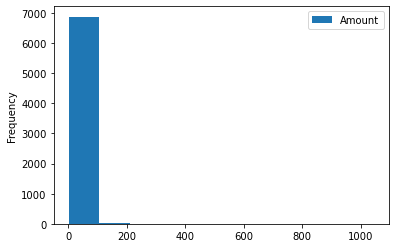

In [41]:
df_set_electronics.plot(x='cluster_id',y='Amount',kind='hist')

In [42]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_5_electronics=df_set_electronics[df_set_electronics['Amount']>5]
df_5_electronics

,cluster_id,Amount
4,2172,6
5,2880,10
6,3529,10
7,3668,15
8,4025,6
...,...,...
47987,75294989,11
48392,76064893,6
48394,76065434,7
49357,78043480,7


In [43]:
df_5_electronics.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1294.0,15.0,49.0,6.0,7.0,8.0,11.0,1043.0


<AxesSubplot:ylabel='Frequency'>

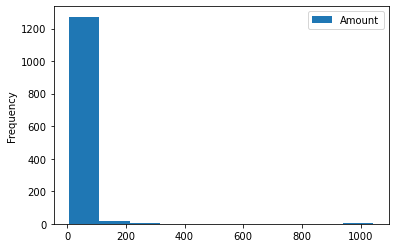

In [44]:
df_5_electronics.plot(x='cluster_id',y='Amount',kind='hist')

In [45]:
df_15_electronics=df_set_electronics[df_set_electronics['Amount']>15]
df_15_electronics

,cluster_id,Amount
14,6076,19
15,6505,16
16,6690,20
20,7366,17
23,9046,21
...,...,...
37772,57235777,27
43828,67449101,24
44143,68112533,17
47508,74270662,206


In [46]:
df_15_electronics.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,155.0,61.0,133.0,16.0,17.0,21.0,32.0,1043.0


<AxesSubplot:ylabel='Frequency'>

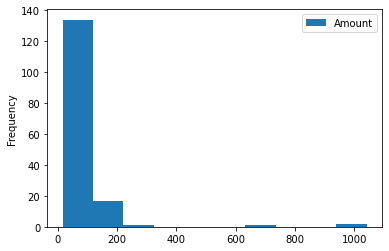

In [47]:
df_15_electronics.plot(x='cluster_id',y='Amount',kind='hist')

In [68]:
df_25_electronics=df_set_electronics[df_set_electronics['Amount']>25]
df_25_electronics

,cluster_id,Amount
77,28307,36
105,37409,28
241,96277,268
245,99153,29
479,197396,30
503,207413,47
587,244025,119
1560,685416,27
1596,704991,35
1666,730377,27


In [69]:
df_25_electronics.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,57.0,133.0,200.0,26.0,30.0,47.0,194.0,1043.0


<AxesSubplot:ylabel='Frequency'>

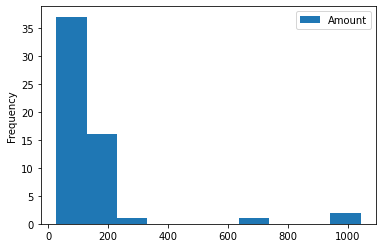

In [70]:
df_25_electronics.plot(x='cluster_id',y='Amount',kind='hist')

In [93]:
#merge brand name to cluster amount
df_cluster_brand = df_15_electronics[df_15_electronics['Amount']<400].merge(df_joined_electronics.dropna()[['cluster_id','brand']].drop_duplicates('cluster_id', keep='last'), left_on=['cluster_id'], right_on = ['cluster_id'], how='left')
df_cluster_brand

,cluster_id,Amount,brand
0,6076,19,canon
1,6505,16,apple
2,6690,20,cisco
3,7366,17,canon
4,9046,21,amd
...,...,...,...
147,57235777,27,samsung
148,67449101,24,xiaomi
149,68112533,17,samsung
150,74270662,206,flex


In [94]:
#get the top clusters per brand
df_top_clusters = df_cluster_brand.sort_values(['Amount'], ascending=False).drop_duplicates(subset=["brand"], keep="first")
df_top_clusters

,cluster_id,Amount,brand
15,96277,268,sony
129,30995813,220,flex
110,3133321,130,canon
145,52664201,81,samsung
112,3730598,55,hp
27,207413,47,intel
83,1381570,38,apple
52,704991,35,nikon
71,1006110,33,resonant
60,835420,30,amd


In [95]:
pd.set_option('display.max_colwidth', None)

In [115]:
df_joined_electronics[(df_joined_electronics['cluster_id']==52664201)]

,cluster_id,url,row_id,table_id,Valid,brand
2208454,52664201,https://www.uccyclery.com/product/delta-mini-tablet-holder-242436-1.htm,715,Product_uccyclery.com_September2020.json.gz,1,None
2400705,52664201,https://www.alamedabicycle.com/product/delta-mini-tablet-holder-242436-1.htm,836,Product_alamedabicycle.com_September2020.json.gz,1,None
2508821,52664201,https://www.actionsportsbicyclecenter.com/product/delta-mini-tablet-holder-242436-1.htm,192,Product_actionsportsbicyclecenter.com_September2020.json.gz,1,None
2539508,52664201,https://www.bicycleseast.com/product/delta-mini-tablet-holder-242436-1.htm,238,Product_bicycleseast.com_September2020.json.gz,1,None
2573533,52664201,https://www.andyjordans.com/product/delta-mini-tablet-holder-242436-1.htm,964,Product_andyjordans.com_September2020.json.gz,1,None
...,...,...,...,...,...,...
23236154,52664201,https://www.meadsbikeshop.com/product/delta-mini-tablet-holder-242436-1.htm,889,Product_meadsbikeshop.com_September2020.json.gz,1,None
23565772,52664201,https://www.ryderbikes.com/product/delta-mini-tablet-holder-242436-1.htm,865,Product_ryderbikes.com_September2020.json.gz,1,None
24162317,52664201,https://www.finishlinebikes.com/product/delta-mini-tablet-holder-242436-1.htm,1002,Product_finishlinebikes.com_September2020.json.gz,1,None
24253484,52664201,https://www.outspokin.net/product/delta-mini-tablet-holder-242436-1.htm,1125,Product_outspokin.net_September2020.json.gz,1,None


In [118]:
#get a new column with the product names from the url
df_joined_electronics['product_name'] = df_joined_electronics['url'].apply(lambda row: row.split("/")[-1])

In [119]:
df_joined_electronics

,cluster_id,url,row_id,table_id,Valid,brand,product_name
0,59178314,https://www.cultureindoor.com/796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html,1561,Product_cultureindoor.com_September2020.json.gz,1,None,796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html
1,70692685,https://www.culturekings.com/products/new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black,3893,Product_culturekings.com_September2020.json.gz,1,None,new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black
2,395606,https://www.culturekings.com/products/new-era-x-nrl-west-tigers-aframe-charcoal-orange,3894,Product_culturekings.com_September2020.json.gz,1,None,new-era-x-nrl-west-tigers-aframe-charcoal-orange
3,3361797,https://www.customizedgirl.com/design/2605608/The+Real+Baseball+Moms,9318,Product_customizedgirl.com_September2020.json.gz,1,None,The+Real+Baseball+Moms
4,235755,https://www.customizedgirl.com/design/2613423/Mentally+Dating+Ronaldo,9319,Product_customizedgirl.com_September2020.json.gz,1,None,Mentally+Dating+Ronaldo
...,...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg3232-03,1620,Product_shop-list.com_September2020.json.gz,1,None,sg3232-03
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None,famille-ltm
24687504,41434658,https://shop.agwaycapecod.com/products/019014710959/adult-small-breed-dog-food-5-lb,126,Product_agwaycapecod.com_September2020.json.gz,1,None,adult-small-breed-dog-food-5-lb
24687505,62702145,https://shop.agwaycapecod.com/products/037321455042/ant-killer-dust-3-lbs,127,Product_agwaycapecod.com_September2020.json.gz,1,None,ant-killer-dust-3-lbs


## Cluster statistics for product category clothes

In [ ]:
df_grouped_clothes = df_joined_clothes.groupby('cluster_id').count()

In [ ]:
# only look at clusters that have at least one brand associated
df_set_clothes = df_grouped_clothes[df_grouped_clothes['brand']>0].reset_index()[['cluster_id','table_id']].rename(columns={'table_id':'Amount'})

In [ ]:
# We discard all clusters with less than 2 entries, cause we cannot match anything there, so 1,6 million clusters remain
df_set_clothes=df_set_clothes[df_set_clothes['Amount']>1]
df_set_clothes

In [ ]:
df_set_clothes.set_index('cluster_id').describe().T.round()

In [ ]:
df_set_clothes.plot(x='cluster_id',y='Amount',kind='hist')

In [ ]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_5_clothes=df_set_clothes[df_set_clothes['Amount']>5]
df_5_clothes

In [ ]:
df_5_clothes.set_index('cluster_id').describe().T.round()

In [ ]:
df_5_clothes.plot(x='cluster_id',y='Amount',kind='hist')

In [ ]:
df_15_clothes=df_set_clothes[df_set_clothes['Amount']>10]
df_15_clothes

In [ ]:
df_15_clothes.set_index('cluster_id').describe().T.round()

In [ ]:
df_15_clothes.plot(x='cluster_id',y='Amount',kind='hist')

## Get information about the cluster distribution per table to get a first glance at which tables for which clusters have an overlap to get good training data

#### Have at first a look at electronic products

In [51]:
df_joined_electronics

,cluster_id,url,row_id,table_id,Valid,brand
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1,None
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1,None
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1,None
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1,None
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1,None
...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1,None
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None
24687504,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1,None
24687505,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1,None


In [52]:
df_grouped_electronics_tables = df_joined_electronics.groupby('table_id').count()

In [53]:
# only look at clusters that have at least one brand associated
df_set_electronics_tables = df_grouped_electronics_tables[df_grouped_electronics_tables['brand']>0].reset_index()[['cluster_id','table_id']].rename(columns={'cluster_id':'Amount'})

In [54]:
df_set_electronics_tables

,Amount,table_id
0,670,Product_0cm.com_September2020.json.gz
1,13,Product_10knew.com_September2020.json.gz
2,891,Product_10sim.com_September2020.json.gz
3,43,Product_123-hampers.co.uk_September2020.json.gz
4,202,Product_1234oo7.com_September2020.json.gz
...,...,...
3242,712,Product_zooscape.com_September2020.json.gz
3243,18,Product_zpower.com.au_September2020.json.gz
3244,37,Product_zspeed.com_September2020.json.gz
3245,34,Product_ztijl.com_September2020.json.gz


In [55]:
df_set_electronics_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,3247.0,398.0,953.0,1.0,37.0,131.0,411.0,16496.0


In [56]:
df_75_electronics_tables=df_set_electronics_tables[df_set_electronics_tables['Amount']>75]
df_75_electronics_tables

,Amount,table_id
0,670,Product_0cm.com_September2020.json.gz
2,891,Product_10sim.com_September2020.json.gz
4,202,Product_1234oo7.com_September2020.json.gz
5,282,Product_12volt-travel.com_September2020.json.gz
7,130,Product_1800timeclocks.com_September2020.json.gz
...,...,...
3234,452,Product_zeusgames.com.br_September2020.json.gz
3238,449,Product_zoccoshop.com_September2020.json.gz
3240,530,Product_zoobi-shop.com_September2020.json.gz
3242,712,Product_zooscape.com_September2020.json.gz


In [57]:
df_75_electronics_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1973.0,634.0,1163.0,76.0,165.0,313.0,688.0,16496.0


<AxesSubplot:ylabel='Frequency'>

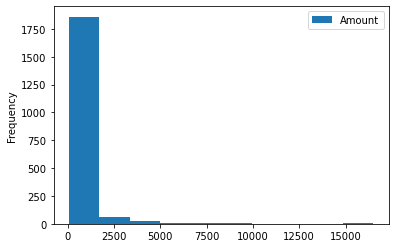

In [58]:
df_75_electronics_tables.plot(x='table_id',y='Amount',kind='hist')

In [59]:
df_150_electronics_tables=df_set_electronics_tables[df_set_electronics_tables['Amount']>150]
df_150_electronics_tables

,Amount,table_id
0,670,Product_0cm.com_September2020.json.gz
2,891,Product_10sim.com_September2020.json.gz
4,202,Product_1234oo7.com_September2020.json.gz
5,282,Product_12volt-travel.com_September2020.json.gz
8,5508,Product_1aauto.com_September2020.json.gz
...,...,...
3233,373,Product_zerolag.com_September2020.json.gz
3234,452,Product_zeusgames.com.br_September2020.json.gz
3238,449,Product_zoccoshop.com_September2020.json.gz
3240,530,Product_zoobi-shop.com_September2020.json.gz


In [60]:
df_150_electronics_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1531.0,786.0,1281.0,151.0,253.0,442.0,808.0,16496.0


<AxesSubplot:ylabel='Frequency'>

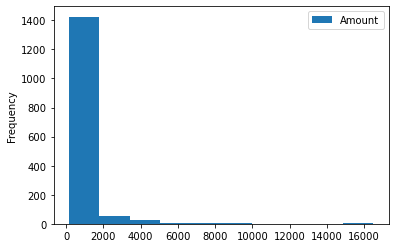

In [61]:
df_150_electronics_tables.plot(x='table_id',y='Amount',kind='hist')

#### Have a look at clothes

In [ ]:
df_joined_clothes

In [ ]:
df_grouped_clothes_tables = df_joined_clothes.groupby('table_id').count()

In [ ]:
# only look at clusters that have at least one brand associated
df_set_clothes_tables = df_grouped_clothes_tables[df_grouped_clothes_tables['brand']>0].reset_index()[['cluster_id','table_id']].rename(columns={'cluster_id':'Amount'})

In [ ]:
df_set_clothes_tables

In [ ]:
df_set_clothes_tables.set_index('table_id').describe().T.round()

In [ ]:
df_75_clothes_tables=df_set_clothes_tables[df_set_clothes_tables['Amount']>75]
df_75_clothes_tables

In [ ]:
df_75_clothes_tables.set_index('table_id').describe().T.round()

In [ ]:
df_75_clothes_tables.plot(x='table_id',y='Amount',kind='hist')

In [ ]:
df_150_clothes_tables=df_set_clothes_tables[df_set_clothes_tables['Amount']>150]
df_150_clothes_tables

In [ ]:
df_150_clothes_tables.set_index('table_id').describe().T.round()

In [ ]:
df_150_clothes_tables.plot(x='table_id',y='Amount',kind='hist')

# Get information about which tables and which clusters have the highest overlap

In [62]:
df_joined_electronics

,cluster_id,url,row_id,table_id,Valid,brand
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1,None
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1,None
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1,None
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1,None
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1,None
...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1,None
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None
24687504,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1,None
24687505,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1,None


In [63]:
# get information about counts of clusters per table
df_electronics_table_id = df_joined_electronics.groupby('table_id').count().reset_index().rename(columns={'brand':'brand_table','cluster_id':'cluster_count'}).drop(columns = ['url','row_id','Valid'])

In [64]:
# get information about counts of tables per cluster
df_electronics_cluster_id = df_joined_electronics.groupby('cluster_id').count().reset_index().rename(columns={'brand':'brand_cluster','table_id':'table_count'}).drop(columns = ['url','row_id','Valid'])

In [65]:
#join the two informations
df_enriched = df_joined_electronics.merge(df_electronics_table_id, how='left',left_on=['table_id'],right_on=['table_id']).merge(df_electronics_cluster_id, how='left',left_on=['cluster_id'],right_on=['cluster_id'])

In [66]:
# select only the entries, where we have at least one brand in table counts and cluster counts
df_enriched = df_enriched[(df_enriched['brand_table']>0) & (df_enriched['brand_cluster']>0)]

In [67]:
df_enriched[df_enriched['table_count']>10].dropna().sort_values(by=['table_id','cluster_id'])

,cluster_id,url,row_id,table_id,Valid,brand,cluster_count,brand_table,table_count,brand_cluster
13163537,289703,https://www.247inktoner.com/genuine-oem-canon-...,1056,Product_247inktoner.com_September2020.json.gz,1,canon,837,265,12,3
9028173,7780966,https://www.a-zprint.com/p/product/6c836b78-d5...,160,Product_a-zprint.com_September2020.json.gz,1,flex,230,11,194,66
13427014,10626565,https://www.a-zprint.com/p/product/ce52bd41-0c...,740,Product_a-zprint.com_September2020.json.gz,1,flex,230,11,201,59
21098439,11332257,https://www.a-zprint.com/p/product/e9f63052-9e...,493,Product_a-zprint.com_September2020.json.gz,1,flex,230,11,193,60
18255872,24321483,https://www.a-zprint.com/p/product/69f6d3d3-b7...,354,Product_a-zprint.com_September2020.json.gz,1,flex,230,11,208,67
...,...,...,...,...,...,...,...,...,...,...
8572471,835420,https://www.zoccoshop.com/amd-ryzen-7-3800x-39...,217,Product_zoccoshop.com_September2020.json.gz,1,amd,449,58,30,1
20727269,881358,https://www.zoccoshop.com/intel-core-i5-9500-3...,426,Product_zoccoshop.com_September2020.json.gz,1,intel,449,58,12,4
20336953,1706093,https://www.zoccoshop.com/intel-core-i5-10500-...,27,Product_zoccoshop.com_September2020.json.gz,1,intel,449,58,14,2
4423594,2108868,https://www.zoccoshop.com/intel-i9-9900kf-360g...,228,Product_zoccoshop.com_September2020.json.gz,1,intel,449,58,16,2
